Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from data import DF

Copy of the main DataFrame

In [2]:
df = DF.copy()
DF.dropna(subset=['job_skills'], inplace=True)

Expand list of job_skills into separate rows (one skill per row)

In [3]:
df_exploded = df.explode('job_skills')

Pivot data by job title and skill to get mean salary and skill counts

In [4]:
df_skills = (
pd.pivot_table(data = df_exploded,
               index = ['job_title_short', 'job_skills'],
               values = 'salary_year_avg',
               aggfunc = {'job_skills':'count', 'salary_year_avg':'median'})

               .rename(columns={'job_skills':'skill_count'})
)

# Droping NaN values and reseting index
df_skills.dropna(subset='salary_year_avg', inplace=True)
df_skills = df_skills.reset_index()

Visualize the top N most frequent skills for a given job and their associated median salaries

,job_skills,skill_count,salary_year_avg
0,sql,92428,92500.0
1,excel,66860,84479.0
2,python,57190,98500.0
3,tableau,46455,95000.0
4,power bi,39380,90000.0
5,r,29996,92527.5
6,sas,27998,90000.0
7,powerpoint,13822,85000.0
8,word,13562,80000.0
9,sap,11280,90000.0


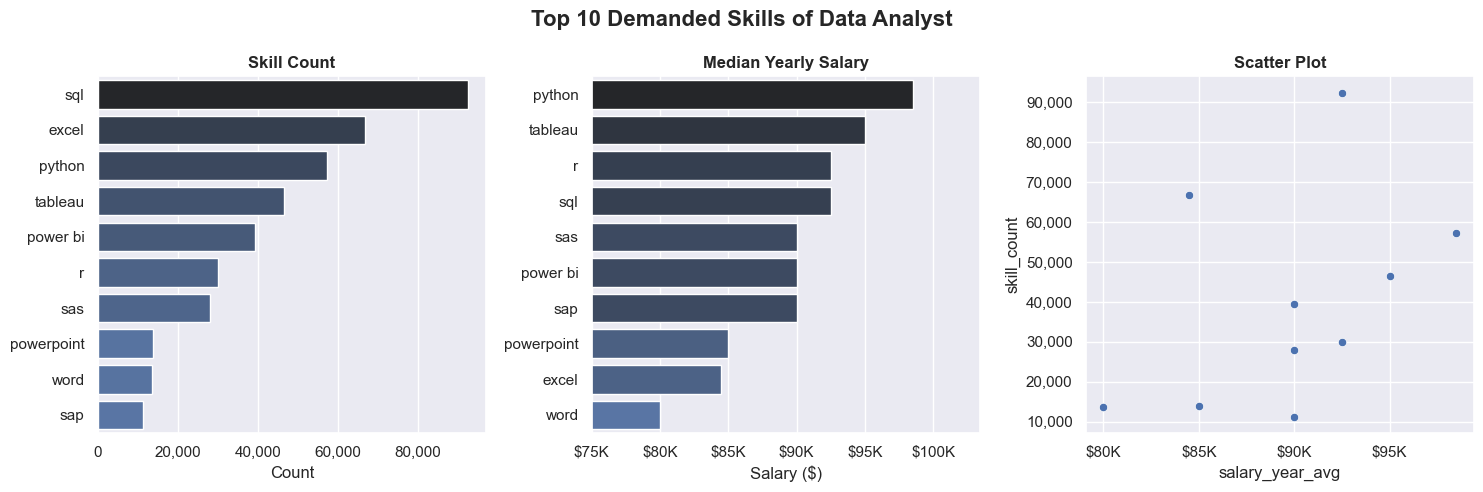

In [10]:
job_title = 'Data Analyst'      # --> Job Title
ntop_skills = 10                # --> No. of Top Skills

fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.set_theme()

# Top demanded skills
df_TopSkills = df_skills[df_skills['job_title_short'] == job_title] \
                        .nlargest(ntop_skills, 'skill_count') \
                        .loc[:, 'job_skills':'salary_year_avg'] \
                        .reset_index(drop=True)
                        
# Top demanded skills bar chart
sns.barplot(data=df_TopSkills, x='skill_count', y='job_skills', ax=ax[0], legend=False, hue='skill_count', palette='dark:b_r')
ax[0].set_title('Skill Count', fontsize=12, fontweight='bold')
ax[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ',')))
ax[0].set_ylabel('')
ax[0].set_xlabel('Count')

# Top demanded skills salaries bar chart
sns.barplot(data=df_TopSkills.sort_values('salary_year_avg', ascending=False), x='salary_year_avg', y='job_skills', 
            ax=ax[1], legend=False, hue='salary_year_avg', palette='dark:b_r')
ax[1].set_title('Median Yearly Salary', fontsize=12, fontweight='bold')
ax[1].set_ylabel('')
ax[1].set_xlim(75000)
ax[1].set_xlabel('Salary ($)')
ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top demanded skills scatter plot
sns.scatterplot(data=df_TopSkills, x='salary_year_avg', y='skill_count', ax=ax[2], legend=False)
ax[2].set_title('Scatter Plot', fontsize=12, fontweight='bold')
ax[2].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, pos: format(int(y), ',')))
ax[2].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Figure title
fig.suptitle(f'Top {ntop_skills} Demanded Skills of {job_title}', fontsize=16, fontweight='bold')
fig.tight_layout()
df_TopSkills


Relationship between top 100 skill frequency and median salary across all jobs

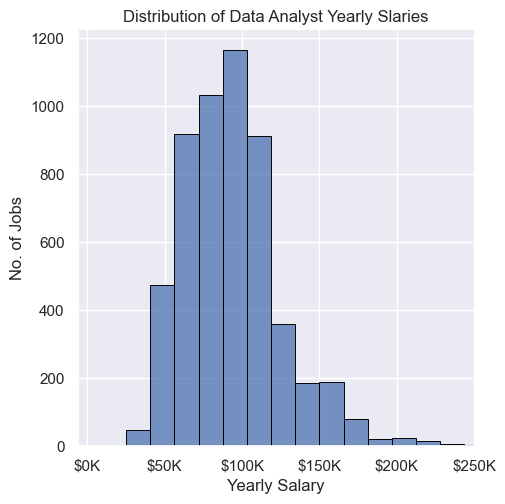

In [6]:
salary_distribution = df['salary_year_avg'][df['job_title_short'] == job_title]

sns.displot(data=salary_distribution, bins=40, edgecolor='black')
plt.title(f"Distribution of {job_title} Yearly Slaries")
plt.ylabel('No. of Jobs')
plt.xlabel('Yearly Salary')
plt.xlim(right=250000)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
